In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RutaFile="/content/drive/MyDrive/pruebas/Training/No lubrication.json.5cdkuekr.ingestion-7689984996-rpt7l.json"
dataframe = pd.read_json(RutaFile)
#print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
#print(Valores.shape)
#print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

Text(0.5, 1.0, 'Bearing without two balls')

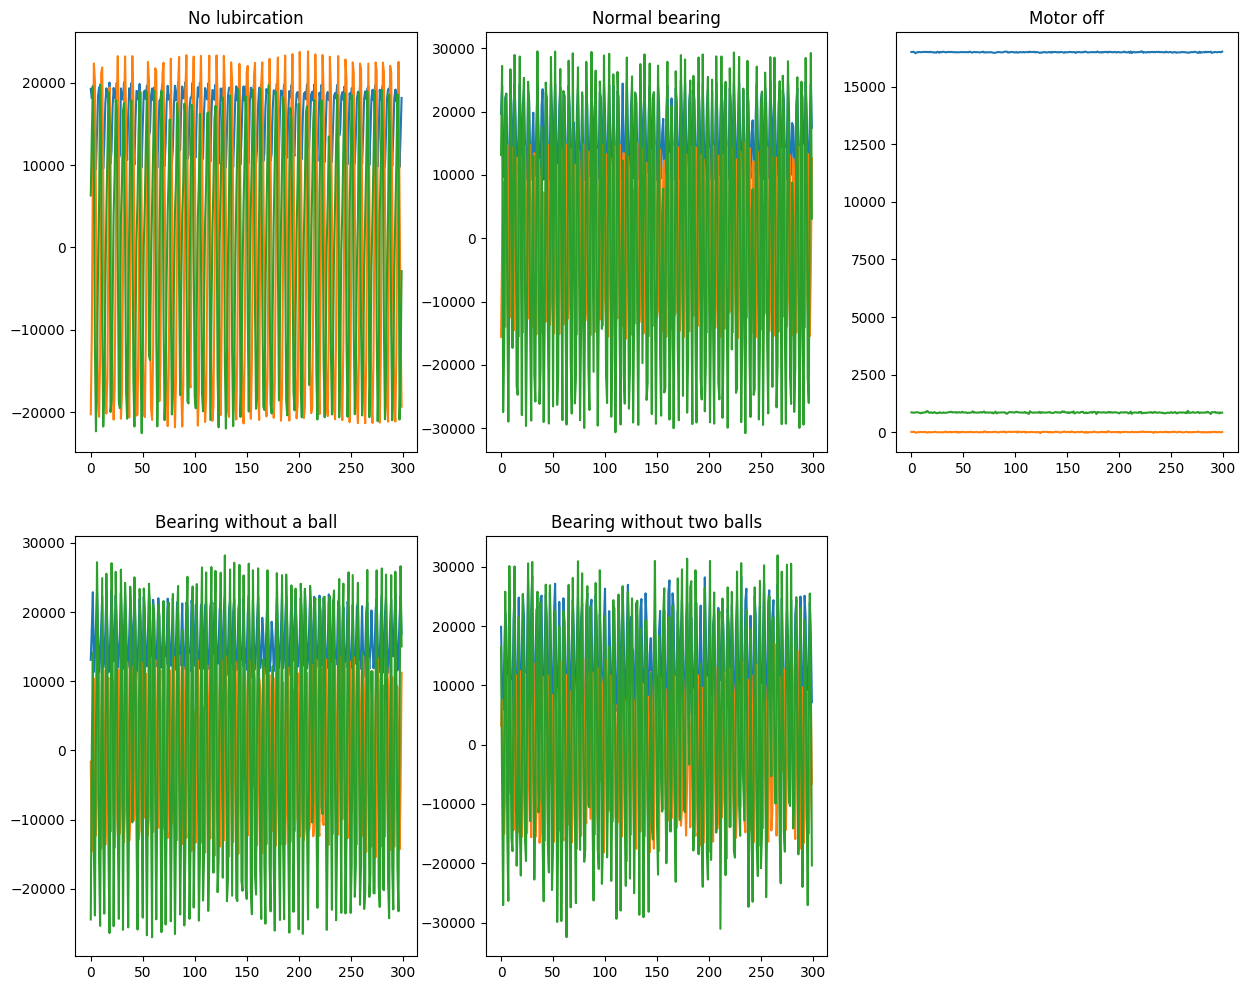

In [ ]:
RutaFile1="/content/drive/MyDrive/pruebas/Training/No lubrication.json.5cdl0iir.ingestion-7689984996-rpt7l.json"
dataframe1 = pd.read_json(RutaFile1)
Valores1 = dataframe1.iloc[:,:].values
DatosOri1=Valores1[7,2][0:-1]
Datos1=np.array(DatosOri1)

RutaFile2="/content/drive/MyDrive/pruebas/Training/Normal Bearing.json.5cdoh0rq.ingestion-7689984996-rpt7l.json"
dataframe2 = pd.read_json(RutaFile2)
Valores2 = dataframe2.iloc[:,:].values
DatosOri2=Valores2[7,2][0:-1]
Datos2=np.array(DatosOri2)

RutaFile3="/content/drive/MyDrive/pruebas/Training/motor off.json.5e5llehm.ingestion-77d754595f-sh7dq.json"
dataframe3 = pd.read_json(RutaFile3)
Valores3 = dataframe3.iloc[:,:].values
DatosOri3=Valores3[7,2][0:-1]
Datos3=np.array(DatosOri3)

RutaFile4="/content/drive/MyDrive/pruebas/Training/no 1 ball.json.5cvl4l9n.ingestion-6564d458d4-n2vrm.json"
dataframe4 = pd.read_json(RutaFile4)
Valores4 = dataframe4.iloc[:,:].values
DatosOri4=Valores4[7,2][0:-1]
Datos4=np.array(DatosOri4)

RutaFile5="/content/drive/MyDrive/pruebas/Training/no 2 ball.json.5cvnniku.ingestion-6564d458d4-sq5wx.json"
dataframe5 = pd.read_json(RutaFile5)
Valores5 = dataframe5.iloc[:,:].values
DatosOri5=Valores5[7,2][0:-1]
Datos5=np.array(DatosOri5)

plt.figure(figsize=(15, 12))
plt.subplot(2,3,1)
plt.plot(Datos1[0:300,:])
plt.title("No lubircation")
plt.subplot(2,3,2)
plt.plot(Datos2[0:300,:])
plt.title("Normal bearing")
plt.subplot(2,3,3)
plt.plot(Datos3[0:300,:])
plt.title("Motor off")
plt.subplot(2,3,4)
plt.plot(Datos4[0:300,:])
plt.title("Bearing without a ball")
plt.subplot(2,3,5)
plt.plot(Datos5[0:300,:])
plt.title("Bearing without two balls")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd


directory = '/content/drive/MyDrive/pruebas/Training/'


files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes

sequence_length = 64
sequence_stride = 10


all_spectral_features = []
all_labels = []

def extract_spectral_features(data, fs=49):
    features = []
    for axis_data in data.T:
        fft_result = np.fft.fft(axis_data)
        freqs = np.fft.fftfreq(len(axis_data), 1/fs)
        magnitude = np.abs(fft_result)
        positive_freqs = freqs[:len(freqs)//2]
        positive_magnitude = magnitude[:len(magnitude)//2]
        dominant_freq = positive_freqs[np.argmax(positive_magnitude)]
        total_energy = np.sum(positive_magnitude**2)
        low_band = np.sum(positive_magnitude[(positive_freqs < 10)]**2)
        mid_band = np.sum(positive_magnitude[(positive_freqs >= 10) & (positive_freqs < 20)]**2)
        high_band = np.sum(positive_magnitude[(positive_freqs >= 20)]**2)
        mean_amplitude = np.mean(positive_magnitude)
        std_amplitude = np.std(positive_magnitude)
        features.append([dominant_freq, total_energy, low_band, mid_band, high_band, mean_amplitude, std_amplitude])
    return np.concatenate(features)


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)


    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)


    current_class = idx // files_per_class


    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )


    X_windows = np.concatenate([x.numpy() for x in dataset], axis=0)


    n_samples, _, n_axes = X_windows.shape
    spectral_features = np.zeros((n_samples, 7 * n_axes))
    for i in range(n_samples):
        spectral_features[i, :] = extract_spectral_features(X_windows[i])

    labels = np.full((n_samples,), current_class)

    all_spectral_features.append(spectral_features)
    all_labels.append(labels)

all_spectral_features = np.vstack(all_spectral_features)
all_labels = np.concatenate(all_labels)





Text(0.5, 1.0, 'Bearing without two balls')

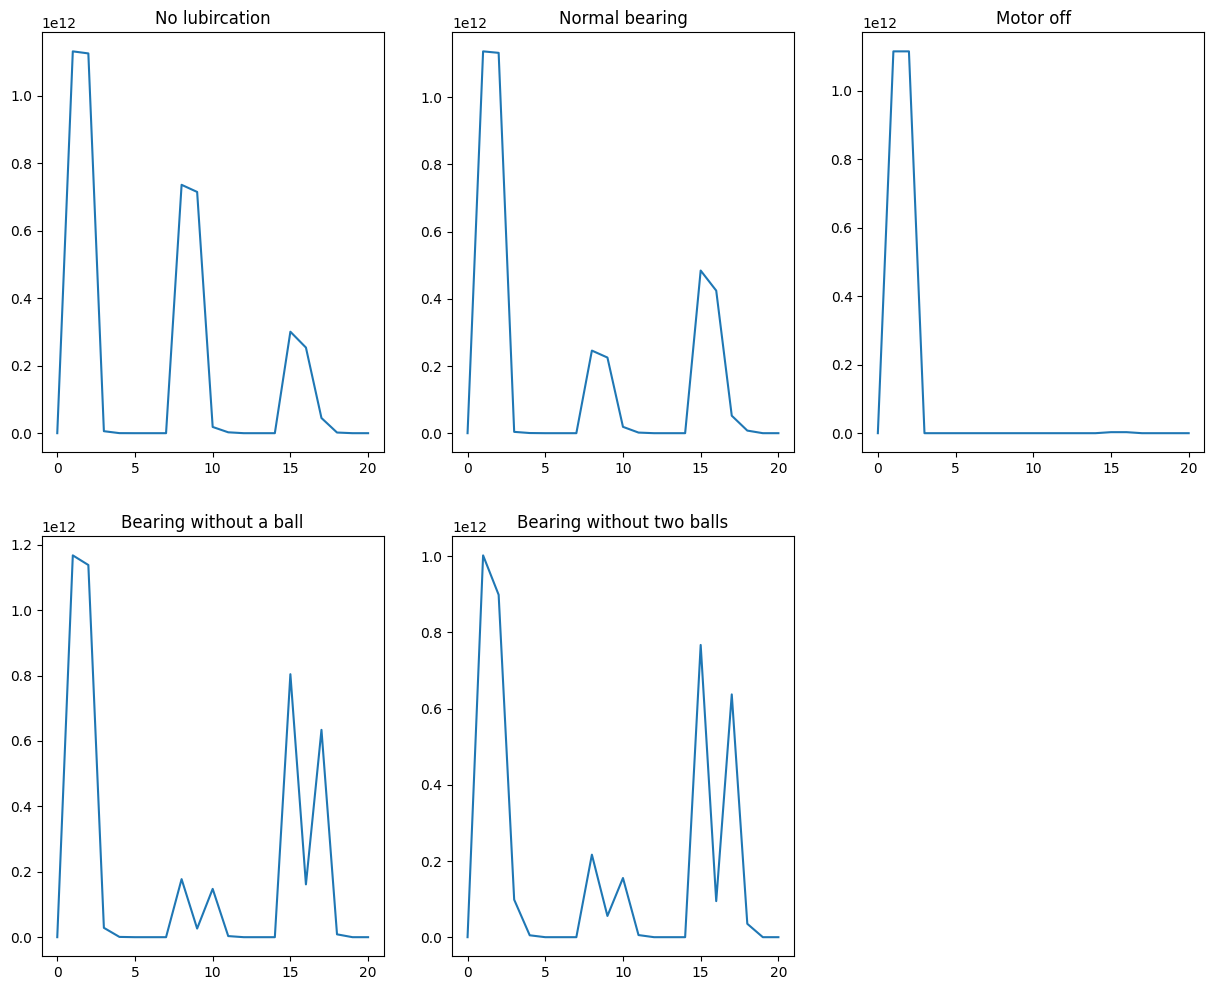

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1)
plt.plot(all_spectral_features[0])
plt.title("No lubircation")
plt.subplot(2,3,2)
plt.plot(all_spectral_features[2300])
plt.title("Normal bearing")
plt.subplot(2,3,3)
plt.plot(all_spectral_features[4600])
plt.title("Motor off")
plt.subplot(2,3,4)
plt.plot(all_spectral_features[7000])
plt.title("Bearing without a ball")
plt.subplot(2,3,5)
plt.plot(all_spectral_features[9000])
plt.title("Bearing without two balls")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

all_labels_categorical = tf.keras.utils.to_categorical(all_labels, num_classes=num_classes)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 970 (3.79 KB)

 Trainable params: 970 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

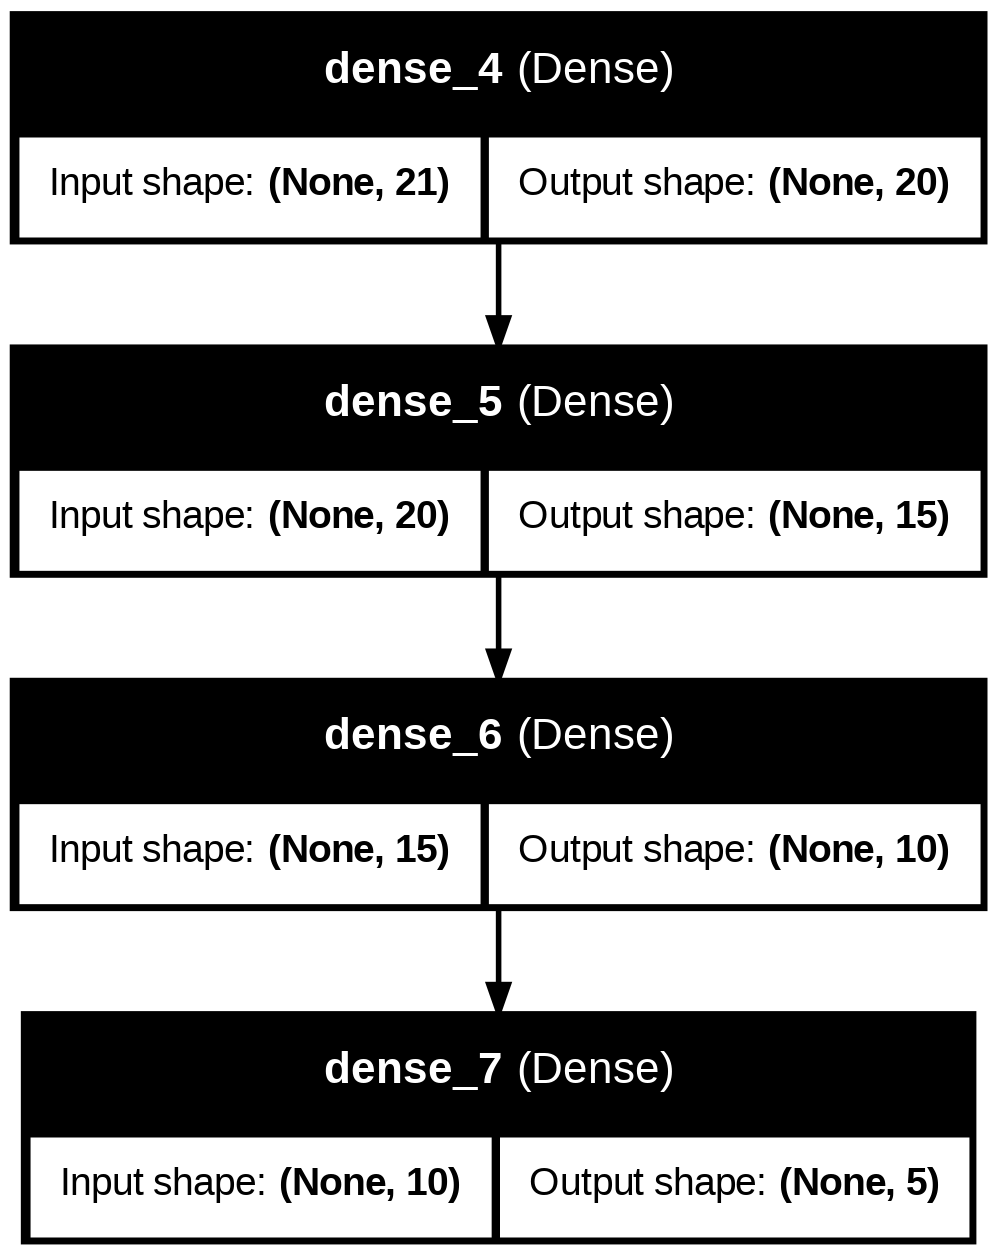

In [ ]:
modelo = Sequential()
modelo.add(Dense(20,input_shape=(21,),activation='relu'))
modelo.add(Dense(15,activation='relu'))
modelo.add(Dense(10,activation='relu'))
modelo.add(Dense(5, activation = 'softmax'))
modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    all_spectral_features, all_labels_categorical, test_size=0.20, random_state=42
)


In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30,batch_size=32,verbose=1)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4928 - loss: 18563479552.0000 - val_accuracy: 0.7964 - val_loss: 233505472.0000
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8420 - loss: 173326256.0000 - val_accuracy: 0.9294 - val_loss: 57586904.0000
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 85000216.0000 - val_accuracy: 0.9377 - val_loss: 40843764.0000
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9074 - loss: 97232616.0000 - val_accuracy: 0.9592 - val_loss: 43537128.0000
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 49632996.0000 - val_accuracy: 0.9110 - val_loss: 75105144.0000
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 35249548.0000 - val_accuracy: 0.9660 - val_loss: 19870312.0000
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 19124830.0000 - val_accuracy: 0.9623 - val_loss: 27400856.0000
E

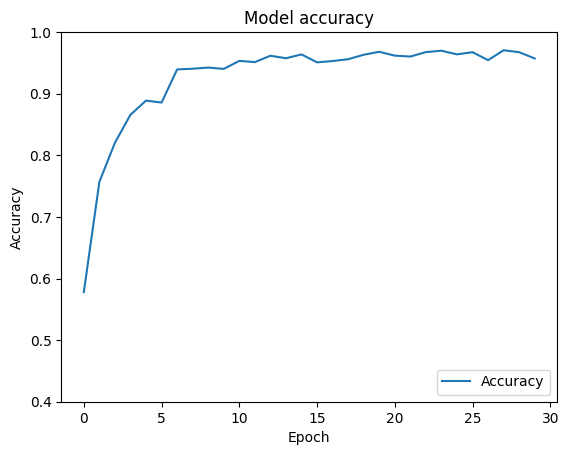

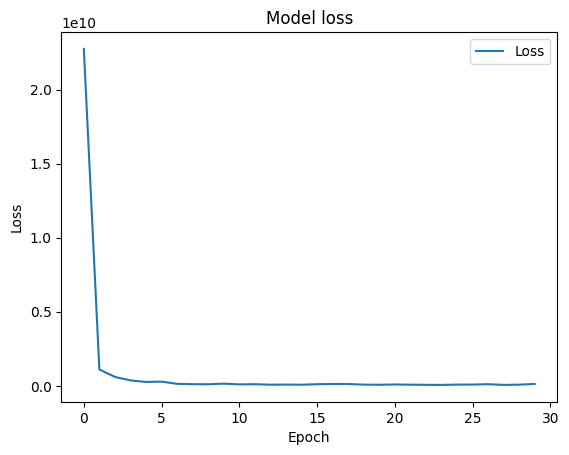

In [ ]:
plt.plot(historia.history['accuracy'], label='Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)

plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:

directory = '/content/drive/MyDrive/pruebas/Testing'

files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes


sequence_length = 64
sequence_stride = 10

all_windowsT = []
all_labelsT = []


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)

    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)

    current_class = idx // files_per_class

    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )

    X_windowsT = np.concatenate([x.numpy() for x in dataset], axis=0)

    labelsT = np.full((X_windowsT.shape[0],), current_class)

    all_windowsT.append(X_windowsT)
    all_labelsT.append(labelsT)

all_windowsT = np.vstack(all_windowsT)
all_labelsT = np.concatenate(all_labelsT)

print(f"Forma de las ventanas: {all_windowsT.shape}")
print(f"Forma de las etiquetas: {all_labelsT.shape}")

Forma de las ventanas: (4095, 64, 3)
Forma de las etiquetas: (4095,)


In [ ]:
n_samples = 4095
n_axes = 3
spectral_features = np.zeros((n_samples, 7 * n_axes))
for i in range(n_samples):
        spectral_features[i, :] = extract_spectral_features(all_windowsT[i])


In [ ]:
print(spectral_features.shape)
caract = spectral_features.reshape(1, -1)
print(caract.shape)

(4095, 21)
(1, 85995)


In [ ]:
predicciones = modelo.predict(spectral_features, batch_size=4095)

clases_predichas = np.argmax(predicciones, axis=1)

print(clases_predichas.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(4095,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = all_labelsT
y_pred = clases_predichas

matriz_confusion = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[817   2   0   0   0]
 [  5 814   0   0   0]
 [  0   0 819   0   0]
 [  0   0   0 819   0]
 [  0   0   0   0 819]]


In [ ]:
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       819
           1       1.00      0.99      1.00       819
           2       1.00      1.00      1.00       819
           3       1.00      1.00      1.00       819
           4       1.00      1.00      1.00       819

    accuracy                           1.00      4095
   macro avg       1.00      1.00      1.00      4095
weighted avg       1.00      1.00      1.00      4095



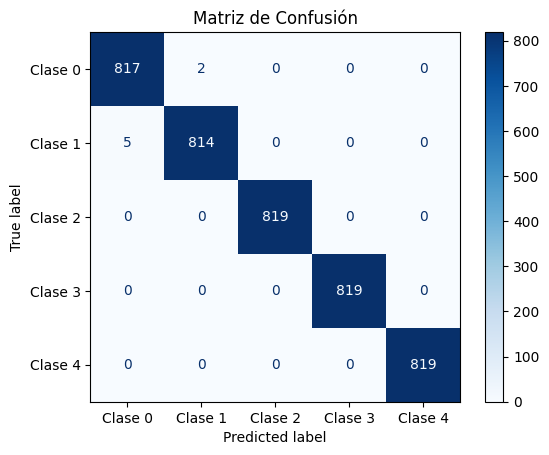

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])

disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
from sklearn.metrics import recall_score, f1_score
# Recall
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Recall: 0.9982905982905983
F1-score: 0.9982905925565638


In [ ]:
from sklearn.metrics import accuracy_score

#accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9983


In [ ]:
# Stay here
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model to disk
open("mlp.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpkqcmpcew'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138946422765728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946422753936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946483184992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946432407808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946432675760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946432675936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138948825852112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138946432454320: TensorSpec(shape=(), dtype=tf.resource, name=None)


6344

In [ ]:
!python -m pip install edgeimpulse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.9.2
    Uninstalling pydantic-2.9.2:
      Successfully

In [ ]:
import edgeimpulse as ei
ei.API_KEY = "ei_984xxxxxxxxxxxxx"

In [ ]:
download_dir = "./"
deploy_filename = "MLP.zip"
deploy_bytes = None

try:
  deploy_bytes = ei.model.deploy(tflite_model, model_output_type= ei.model.output_type.Classification(),deploy_target="arduino")

except Exception as e:
  print(f"could not deploy model: {e}")

if deploy_bytes is not None:
  with open(deploy_filename, "wb") as f:
    f.write(deploy_bytes.getvalue())